In [1]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam", "toy"]:
        data = np.load(f"data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)





loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 106)
training_data (4171, 106)
training_labels (4171,)

loaded toy data!
test_data (0,)
training_data (1000, 2)
training_labels (1000,)


In [2]:
#3(a)

import random
random.seed(1)

#split the list into 2 lists by given indicated proportion
def splitList(portion1, portion2, a_List):
    total = portion1 + portion2
    length = len(a_List)
    num = int(portion1 * length / total)
    return a_List[:num], a_List[num:]

#minst
data = np.load(f"data/mnist-data.npz")
combinedList = list(zip(data["training_data"], data["training_labels"]))
test_data_minst_Kaggle = data["test_data"]
random.shuffle(combinedList)
training_data_minst, training_labels_minst_orig = zip(*combinedList)
training_set_minst, validation_set_minst = splitList(5,1, training_data_minst)
training_labels_minst, validation_labels_minst = splitList(5,1, training_labels_minst_orig)

#spam 
data = np.load(f"data/spam-data.npz")
combinedList = list(zip(data["training_data"], data["training_labels"]))
test_data_spam_Kaggle = data["test_data"]
random.shuffle(combinedList)
training_data_spam, training_labels_spam_orig = zip(*combinedList)
training_set_spam, validation_set_spam = splitList(4,1, training_data_spam)
training_labels_spam, validation_labels_spam = splitList(4,1, training_labels_spam_orig)

#toy
data = np.load(f"data/toy-data.npz")
training_data_toy, training_labels_toy = data["training_data"], data["training_labels"]


#3(b)
def accuracy_score(labels, predictions, length):
    score = 0
    for i in range(length):
        if (labels[i] == predictions[i]):
            score += 1
            #print("test")
    return score / length
    
#Flat (make it 1D) the array with given array and lenght
def flatten_array(arr, length):
    training_examples = [0]*length
    #print(length)
    for i in range(length):
        training_examples[i] = arr[i].flatten()
    return training_examples

#Take in data and labels and separate them into given number of arrys, code is above along with other methods
def split_num_list(training_data, training_labels, num):
    length = len(training_data)
    average_length = int(length / num)
    training_data_segments = []
    training_labels_segments = []
    for i in range(0, len(training_data), average_length):
        #print("test")
        if (len(training_data) - i ) < (average_length * 2):
            training_data_segments.append(training_data[i: i + average_length])
            training_labels_segments.append(training_labels[i: i + average_length])      
            break
        training_data_segments.append(training_data[i:i + average_length])
        training_labels_segments.append(training_labels[i:i + average_length])
        
    return training_data_segments, training_labels_segments

#Convert the given array to a file with a given filename
def array_to_csv (arr, filename):
    with open(filename, 'w') as file:
        file.write("Id,Category\n")
        for i, v in enumerate(arr):
            file.write(f'{i +1}, {v}\n')

    

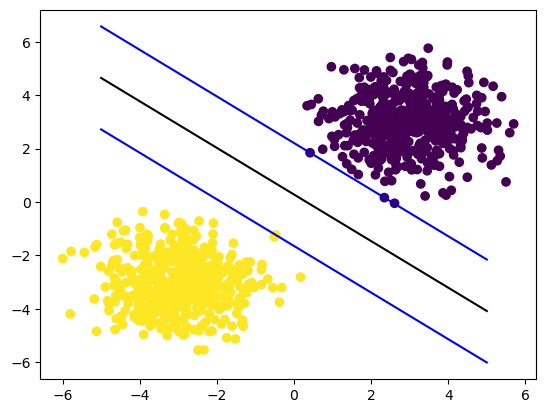

In [3]:
#2(e)
plt.scatter(training_data_toy[:, 0], training_data_toy[:, 1], c = training_labels_toy)
# Plot the decision boundary
w = [-0.4528, -0.5190]
b = 0.1471
x = np.linspace(-5, 5, 100)
y = -(w[0] * x + b) / w[1]
plt.plot(x, y, c = 'k')
# Plot the margins
## TODO

x_points = np.linspace(-5, 5)
y_points_positive = 1 / w[1] - b / w[1] - (w[0]/ w[1]) * x_points
y_points_negative = -1 / w[1] - b / w[1] - (w[0]/ w[1]) * x_points
plt.plot(x_points, y_points_positive, c='b');
plt.plot(x_points, y_points_negative, c='b');

validation score: 
0.7321
training score: 
1.0
validation score: 
0.806
training score: 
1.0
validation score: 
0.8579
training score: 
1.0
validation score: 
0.8736
training score: 
1.0
validation score: 
0.8914
training score: 
1.0
validation score: 
0.906
training score: 
1.0
validation score: 
0.9076
training score: 
1.0
[0.7321, 0.806, 0.8579, 0.8736, 0.8914, 0.906, 0.9076]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


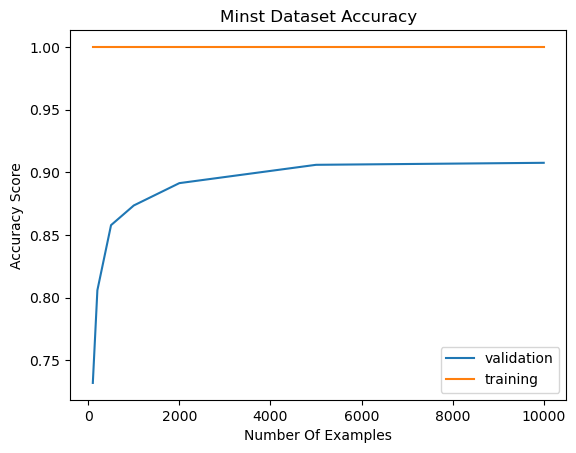

validation score: 
0.8179640718562874
training score: 
0.89
validation score: 
0.8287425149700599
training score: 
0.885
validation score: 
0.8419161676646707
training score: 
0.876
validation score: 
0.8455089820359282
training score: 
0.862
validation score: 
0.8431137724550898
training score: 
0.835
validation score: 
0.8479041916167664
training score: 
0.8414268585131894
[0.8179640718562874, 0.8287425149700599, 0.8419161676646707, 0.8455089820359282, 0.8431137724550898, 0.8479041916167664]
[0.89, 0.885, 0.876, 0.862, 0.835, 0.8414268585131894]


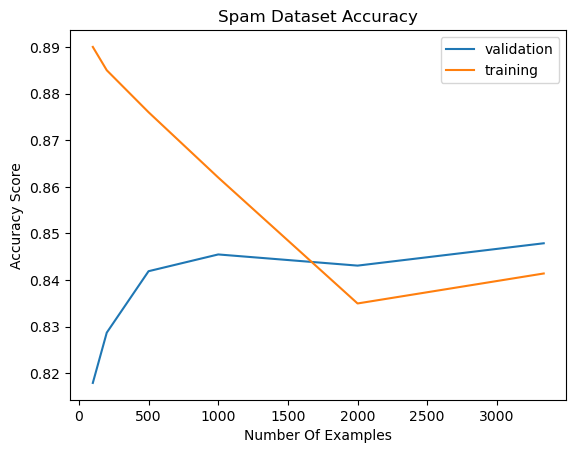

In [4]:
#4(a)(b)
example_numbers_minst =[100,200,500,1000,2000,5000,10000]
example_numbers_spam =[100, 200, 500, 1000, 2000, 3336] 
accuracy_scores_validation = []
accuracy_scores_training = []

def training_SVC(training_set, validation_set, training_labels, validation_labels, example_numbers, title_name):
    for num in example_numbers:
        trainging_examples = flatten_array(training_set, num)
        validation_examples = flatten_array(validation_set, len(validation_set))
        clf = svm.SVC(kernel='linear')
        clf.fit(trainging_examples, training_labels[:num])
        prediction_validation = clf.predict(validation_examples)
        prediction_training = clf.predict(trainging_examples)
        score_validation = accuracy_score(validation_labels, prediction_validation,len(validation_set) )
        score_training = accuracy_score(training_labels, prediction_training, num)
        accuracy_scores_validation.append(score_validation)
        accuracy_scores_training.append(score_training)

        print("validation score: ")
        print(score_validation)
        print("training score: ")
        print(score_training)

    print(accuracy_scores_validation)
    print(accuracy_scores_training)
    plt.plot(example_numbers, accuracy_scores_validation, label = "validation")
    plt.plot(example_numbers, accuracy_scores_training, label = "training")
    plt.title(title_name)
    plt.xlabel("Number Of Examples")
    plt.ylabel("Accuracy Score")
    plt.legend()
    plt.show()
    
    accuracy_scores_validation.clear()
    accuracy_scores_training.clear()
    


training_SVC(training_set_minst, validation_set_minst, training_labels_minst, validation_labels_minst,example_numbers_minst, "Minst Dataset Accuracy")
training_SVC(training_set_spam, validation_set_spam, training_labels_spam, validation_labels_spam, example_numbers_spam, "Spam Dataset Accuracy")

In [ ]:
#5
accuracy_scores_validation = []
accuracy_scores_training = []
C_values = []
example_numbers_minst = 10000

C = 1.0e-08
while C <= 1:
    C_values.append(C)
    C *= 10
    
def training_SVC_with_C_values(training_set, validation_set, training_labels, validation_labels, example_numbers, title_name, C_values):
    print("start of the program \n\n")
    best_C = 0
    score = 0
    trainging_examples = flatten_array(training_set, 10000)
    validation_examples = flatten_array(validation_set, len(validation_set))
    for num in C_values:
        clf = svm.SVC(C = num, kernel='linear')
        clf.fit(trainging_examples, training_labels[:10000])
        prediction_validation = clf.predict(validation_examples)
        prediction_training = clf.predict(trainging_examples)
        score_validation = accuracy_score(validation_labels, prediction_validation,len(validation_set) )
        score_training = accuracy_score(training_labels, prediction_training, 10000)
        accuracy_scores_validation.append(score_validation)
        accuracy_scores_training.append(score_training)

        if (score_validation > score):
            best_C = num
            score = score_validation
            
        print("C-Value: ", num)
        print("validation score: ", score_validation)
        print("training score: ", score_training)
        print("\n")

    print("validation score: ")
    print(accuracy_scores_validation)
    print("training score: ")
    print(accuracy_scores_training)
    print("The best C is: ", best_C)

    accuracy_scores_validation.clear()
    accuracy_scores_training.clear()
    
training_SVC_with_C_values(training_set_minst, validation_set_minst, training_labels_minst, validation_labels_minst, example_numbers_minst, "Minst Dataset Accuracy", C_values)

In [ ]:
#6
accuracy_scores_validation = []
accuracy_scores_training = []
C_values = []

C = 1
while C <= 50:
    C_values.append(C)
    C += 5

    
def training_SVC_with_K_Fold(training_set_segments, training_labels_segments, C_values, K_Folds):
    print("start of the program \n\n")
    best_C = 0
    best_score = 0
    for C_val in C_values:
        total_score_validation = 0
        total_score_training = 0
        print("C_value = ", C_val)
        for num in range(K_Folds):
            clf = svm.SVC(C = C_val, kernel='linear')
            validation_data = training_set_segments[num]
            validation_labels = training_labels_segments[num]
            training_data  = []
            training_labels = []
    
            for num1 in range(K_Folds):
                if (num != num1):
                    #print(num1)
                    #print("test1")
                    training_data.extend(training_set_segments[num1])
                    training_labels.extend(training_labels_segments[num1])
                    '''
                    print(len(training_data_k))
                    print(len(training_labels))
                    '''
                    #print("test2")
                
            training_examples = flatten_array(training_data, len(training_data))
            validation_examples = flatten_array(validation_data, len(validation_data ))
            """
            print(len(training_data_k))
            print(len(training_examples))
            print(len(training_labels))
            """
            clf.fit(training_examples, training_labels)
            prediction_validation = clf.predict(validation_data)
            prediction_training = clf.predict(training_data)
            score_validation = accuracy_score(validation_labels, prediction_validation,len(validation_data) )
            score_training = accuracy_score(training_labels, prediction_training, len(training_data))
            total_score_validation += score_validation
            total_score_training += score_training
            accuracy_scores_validation.append(score_validation)
            accuracy_scores_training.append(score_training)
            '''
            print(score_validation)
            print(score_training)
            '''
        average_score_validation =  total_score_validation / float(K_Folds)
        average_score_training = total_score_training / float(K_Folds)
        print("Average Validation Score: ", average_score_validation)
        print("Average Training Score: ", average_score_validation)
        print("\n")

        if (average_score_validation > best_score):
            best_C = C_val
            best_score = average_score_validation
    
    print("\n")
    print ("Best C: ", best_C)
    accuracy_scores_validation.clear()
    accuracy_scores_training.clear()


training_data_segments_spam, training_labels_segments_spam = split_num_list(training_data_spam, training_labels_spam_orig, 5)
"""
for i in range(len(training_data_segments_spam)):
    print(len(training_labels_segments_spam[i]))


print(len(training_data_segments_spam))
print(len(training_labels_segments_spam))
"""
training_SVC_with_K_Fold(training_data_segments_spam, training_labels_segments_spam, C_values, 5)




In [ ]:
#7 for testing rbf C values

accuracy_scores_validation = []
accuracy_scores_training = []
example_numbers_minst = 10000

C_minst = [1, 5, 10, 15, 20, 25]

    
def training_SVC_with_C_values_rbf(training_set, validation_set, training_labels, validation_labels, example_numbers, title_name, C_values):
    print("start of the program \n\n")
    best_C = 0
    score = 0
    trainging_examples = flatten_array(training_set, 10000)
    validation_examples = flatten_array(validation_set, len(validation_set))
    for num in C_values:
        clf = svm.SVC(C = num, kernel='rbf')
        clf.fit(trainging_examples, training_labels[:10000])
        prediction_validation = clf.predict(validation_examples)
        prediction_training = clf.predict(trainging_examples)
        score_validation = accuracy_score(validation_labels, prediction_validation,len(validation_set) )
        score_training = accuracy_score(training_labels, prediction_training, 10000)
        accuracy_scores_validation.append(score_validation)
        accuracy_scores_training.append(score_training)

        if (score_validation > score):
            best_C = num
            score = score_validation
            
        print("C-Value: ", num)
        print("validation score: ", score_validation)
        print("training score: ", score_training)
        print("\n")

    print("validation score: ")
    print(accuracy_scores_validation)
    print("training score: ")
    print(accuracy_scores_training)
    print("The best C is: ", best_C)

    accuracy_scores_validation.clear()
    accuracy_scores_training.clear()
    


C_spam = [100, 200, 300, 400, 500]


def training_SVC_with_K_Fold_rbf(training_set_segments, training_labels_segments, C_values, K_Folds):
    print("start of the program \n\n")
    best_C = 0
    best_score = 0
    for C_val in C_values:
        total_score_validation = 0
        total_score_training = 0
        print("C_value = ", C_val)
        for num in range(K_Folds):
            clf = svm.SVC(C = C_val, kernel='rbf')
            validation_data = training_set_segments[num]
            validation_labels = training_labels_segments[num]
            training_data  = []
            training_labels = []
    
            for num1 in range(K_Folds):
                if (num != num1):
                    #print(num1)
                    #print("test1")
                    training_data.extend(training_set_segments[num1])
                    training_labels.extend(training_labels_segments[num1])
                    '''
                    print(len(training_data_k))
                    print(len(training_labels))
                    '''
                    #print("test2")
                
            training_examples = flatten_array(training_data, len(training_data))
            validation_examples = flatten_array(validation_data, len(validation_data ))
            """
            print(len(training_data_k))
            print(len(training_examples))
            print(len(training_labels))
            """
            clf.fit(training_examples, training_labels)
            prediction_validation = clf.predict(validation_data)
            prediction_training = clf.predict(training_data)
            score_validation = accuracy_score(validation_labels, prediction_validation,len(validation_data) )
            score_training = accuracy_score(training_labels, prediction_training, len(training_data))
            total_score_validation += score_validation
            total_score_training += score_training
            accuracy_scores_validation.append(score_validation)
            accuracy_scores_training.append(score_training)
            '''
            print(score_validation)
            print(score_training)
            '''
        average_score_validation =  total_score_validation / float(K_Folds)
        average_score_training = total_score_training / float(K_Folds)
        print("Average Validation Score: ", average_score_validation)
        print("Average Training Score: ", average_score_validation)
        print("\n")

        if (average_score_validation > best_score):
            best_C = C_val
            best_score = average_score_validation
    
    print("\n")
    print ("Best C: ", best_C)
    accuracy_scores_validation.clear()
    accuracy_scores_training.clear()

training_SVC_with_C_values_rbf(training_set_minst, validation_set_minst, training_labels_minst, validation_labels_minst, example_numbers_minst, "Minst Dataset Accuracy", C_minst)
training_data_segments_spam, training_labels_segments_spam = split_num_list(training_data_spam, training_labels_spam_orig, 5)
training_SVC_with_K_Fold_rbf(training_data_segments_spam, training_labels_segments_spam, C_spam,  5)

In [ ]:
#7 test data to Kaagle prediction array

best_C_minst_linear = [1e-06]
best_C_minst_rbf = [10]
best_C_spam_linear = [31]
best_C_spam_rbf = [500]


def training_SVC_with_C_values_Kaggle(training_set, training_labels, test_data, C_values):
    print("Start")
    
    trainging_examples = flatten_array(training_set, 10000)
    test_examples = flatten_array(test_data, len(test_data ))
    for num in C_values:
        print("C vlaue: ")
        print (num)
        clf = svm.SVC(C = num, kernel='rbf')
        clf.fit(trainging_examples, training_labels[:10000])
        prediction_test = clf.predict(test_examples)
    return prediction_test



def training_SVC_with_K_Fold_Kaggle(training_set_segments, training_labels_segments, test_data, C_values, K_Folds):
    for C_val in C_values:
        print("C_value = ", C_val)
        for num in range(K_Folds):
            clf = svm.SVC(C = C_val, kernel='rbf')
            validation_data = training_set_segments[num]
            validation_labels = training_labels_segments[num]
            training_data  = []
            training_labels = []
    
            for num1 in range(K_Folds):
                if (num != num1):
                    training_data.extend(training_set_segments[num1])
                    training_labels.extend(training_labels_segments[num1])

            training_examples = flatten_array(training_data, len(training_data))
            validation_examples = flatten_array(validation_data, len(validation_data ))
            test_examples = flatten_array(test_data, len(test_data ))
            clf.fit(training_examples, training_labels)
            prediction_test_data = clf.predict(test_data)
            return prediction_test_data


training_data_segments_spam, training_labels_segments_spam = split_num_list(training_data_spam, training_labels_spam_orig, 5)
prediction_spam_Kaggle = training_SVC_with_K_Fold_Kaggle(training_data_segments_spam, training_labels_segments_spam, test_data_spam_Kaggle, best_C_spam_rbf, 5)
prediction_minst_Kaggle = training_SVC_with_C_values_Kaggle(training_set_minst, training_labels_minst, test_data_minst_Kaggle, best_C_minst_rbf)
print(prediction_spam_Kaggle)
print(prediction_minst_Kaggle)


In [ ]:
array_to_csv(prediction_spam_Kaggle, "spam_rbf_final.csv")
array_to_csv(prediction_minst_Kaggle, "minst_rbf_final.csv")
print("finish")